In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv', sep=',') #TODO

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()
# df['AGE'].mean()
# df['AGE'].max()
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [ ]:
#TODO

In [27]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
len(df[(df['SEX']==2) & (df['EDUCATION']==2)])

8656

In [36]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df.groupby('default.payment.next.month').median().T.iloc[6:]

default.payment.next.month,0,1
PAY_0,0.0,1.0
PAY_2,0.0,0.0
PAY_3,0.0,0.0
PAY_4,0.0,0.0
PAY_5,0.0,0.0
PAY_6,0.0,0.0
BILL_AMT1,23119.5,20185.0
BILL_AMT2,21660.5,20300.5
BILL_AMT3,20202.5,19834.5
BILL_AMT4,19000.0,19119.5


In [49]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(index=['SEX', 'EDUCATION','MARRIAGE'],aggfunc='count', values=['ID'] )#TODO

ID
SEX EDUCATION MARRIAGE      
1   0         1            2
              2            6
    1         0            1
              1         1690
              2         2633
              3           30
    2         0            1
              1         2370
              2         2940
              3           63
    3         0           12
              1         1048
              2          894
              3           36
    4         1           18
              2           23
              3            1
    5         1           48
              2           46
              3            1
    6         1           14
              2           11
2   0         1            2
              2            4
    1         0            3
              1         2032
              2         4176
              3           20
    2         0            5
              1         4472
              2         4080
              3           99
    3         0           32
              1         1813
              2         1015
              3           67
    4         1           34
              2           45
              3            2
    5         1          102
              2           81
              3            2
    6         1           14
              2           10
              3            2

In [51]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

def lim_letter(x):
    if x <=10000:
        return 'A'
    elif x <=100000 and x >10000:
        return 'B'
    elif x <=200000 and x  >100000:
        return 'C'
    elif x <=400000 and x  >200000:
        return 'D'
    elif x <=700000 and x  >400000:
        return 'E'
    elif x >700000:
        return 'F'
df['LIMIT_LETTER']= df['LIMIT_BAL'].map(lim_letter) 

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

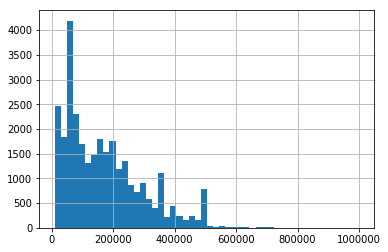

In [56]:
df['LIMIT_BAL'].hist(bins=50) #TODO

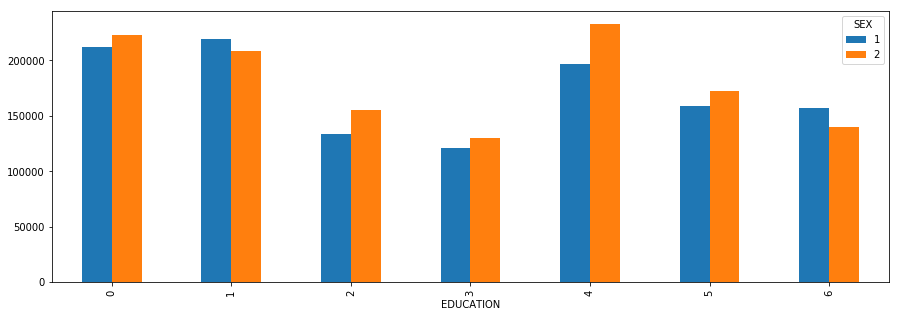

In [106]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
#TODO

new_df = df[['SEX', 'EDUCATION','LIMIT_BAL']]
fig, ax = plt.subplots(figsize = (15,5))
new_pivot_df = new_df.pivot_table('LIMIT_BAL', 'EDUCATION','SEX','mean')
new_pivot_df.plot(kind='bar', ax = ax)

# Пробовал более контроллируемо задать PIVOT:
# new_df.pivot_table(index = ['EDUCATION'],columns = ['SEX'], values=['LIMIT_BAL'], aggfunc='mean').plot(kind='bar', stacked = False)


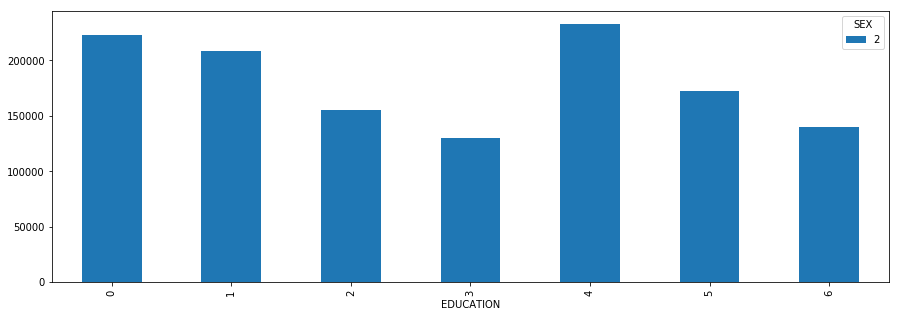

In [104]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

new_df = df[['SEX', 'EDUCATION','LIMIT_BAL']][df['SEX']==2]
fig, ax = plt.subplots(figsize = (15,5))
new_pivot_df = new_df.pivot_table('LIMIT_BAL', 'EDUCATION','SEX','mean')
new_pivot_df.plot(kind='bar', ax = ax)
#TODO


In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO